<a href="https://colab.research.google.com/github/rg81073/Machine_Learning_Projects/blob/main/Gold_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Gold Price Prediction dataset consists of various financial and economic indicators, including the date, S&P 500 index (SPX), Gold price (GLD), US Oil Fund (USO), Silver price (SLV), and the exchange rate between the Euro and the US Dollar (EUR/USD). This dataset is designed for predicting the future price of Gold (GLD) based on the historical values of these key financial factors.

The dataset provides a time-series view of the financial market, allowing data analysts and machine learning practitioners to explore and analyze the relationships between Gold prices and other influential factors. Each entry in the dataset represents a specific date along with the corresponding values of the financial indicators.

The features in the dataset are as follows:

Date: The date for which the financial data is recorded.
S&P 500 index (SPX): A broad stock market index representing the performance of 500 large companies in the US stock market.
Gold price (GLD): The price of Gold, which is considered a safe-haven asset and often used as a store of value.
US Oil Fund (USO): An exchange-traded security that tracks the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil.
Silver price (SLV): The price of Silver, which, like Gold, is considered a precious metal and used for various industrial and investment purposes.
Euro to US Dollar exchange rate (EUR/USD): The value of 1 Euro in US Dollars, representing the exchange rate between these two currencies

**Importing the Dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Preprocessing**

In [2]:
# Loading the CSV data to a  Pandas DataFrame

gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
# print first 5 rows of the DataFrame

gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Printing the last 5 rows of the DataFrame

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Number of rows and columns

gold_data.shape

(2290, 6)

In [6]:
# Getting some basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Statistical Measures on the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Checking for Correlation :

1. Positive Correlation

2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<ipython-input-9-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


**Constructing the Heatmap to understand the correlation**

<Axes: >

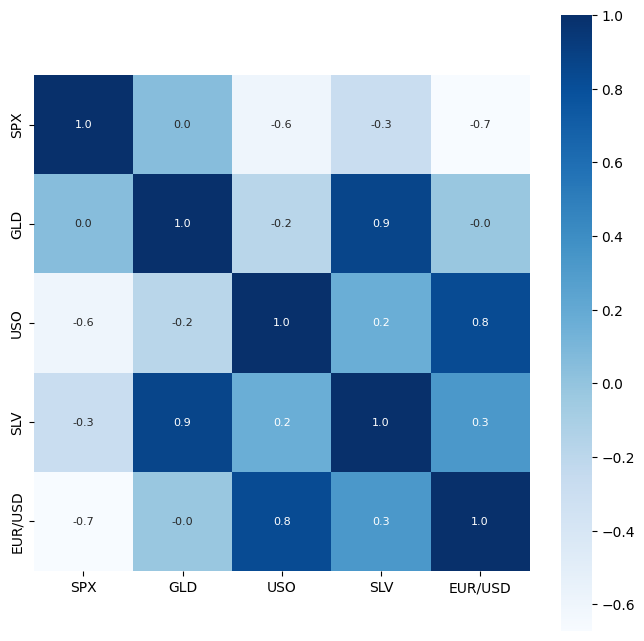

In [10]:
# Heatmap

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot=True, annot_kws = {'size': 8},cmap = 'Blues')

In [11]:
# Correlation values of GOLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-086ed95171ea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

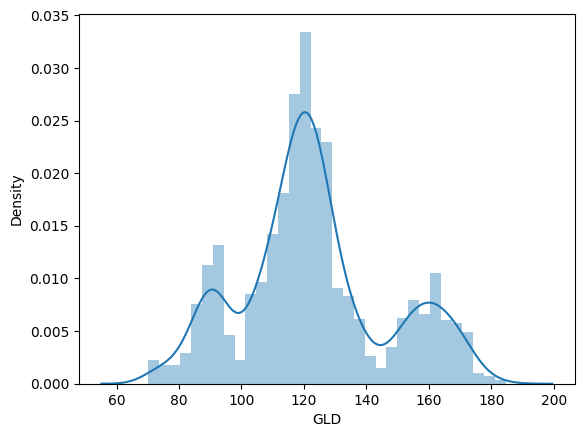

In [12]:
# Checking the distribution of the GLD Price

sns.distplot(gold_data['GLD'])

<Axes: xlabel='GLD', ylabel='Count'>

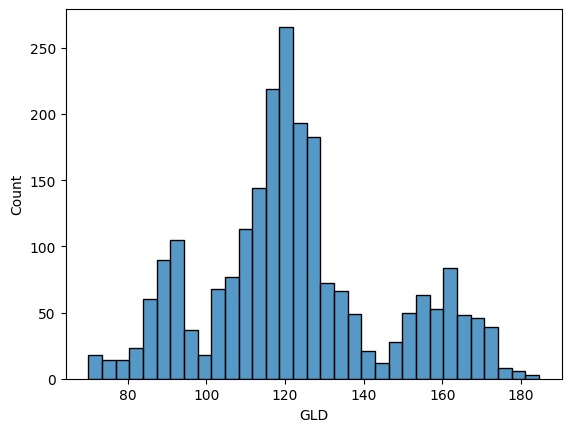

In [13]:
sns.histplot(gold_data['GLD'])

**Splitting the features and Target**

In [14]:
X= gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting in to the Training and Test Data**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =2)

**Model Training : Random Forest Regressor**

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
# Training the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [20]:
# Prediction on the test data

test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.55299961  82.3240997  116.23380006 127.46470064 120.66320121
 154.48049817 150.28609931 126.14050002 117.40949887 126.09930051
 116.88180089 172.11620071 141.21709908 167.56769867 115.10729988
 117.64170045 139.76250229 170.21850135 159.52680237 157.94779986
 155.15179999 125.22120031 174.93460064 157.4969043  125.20610035
  93.73669974  77.69330029 120.65669996 119.19779941 167.44700009
  88.4619008  125.53870071  91.09410057 117.88139967 121.08829941
 136.43260108 115.45250139 115.03430073 147.02380018 107.31340062
 104.64380277  87.18099768 126.49160054 117.86379984 152.67649934
 119.51810023 108.27289992 108.48839853  93.09590037 127.07409784
  74.49330089 113.49999883 121.3583999  111.33619938 118.7241989
 120.34719952 159.28449958 168.92910142 146.96919707  85.79789871
  94.16110039  86.79839904  90.4283001  118.82970073 126.39910055
 127.59290054 169.45319941 122.19519928 117.34419869  98.37140041
 168.06150122 142.89829779 131.34460276 121.09110247 120.9565996
 119.8057006

In [22]:
# R- Squared Error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : " , error_score)                       # Should be less which improve the accuracy

R Squared Error :  0.9886167009275962


**Compare the Actual Values and Predicted Values in a Plot**

In [23]:
Y_test = list(Y_test)

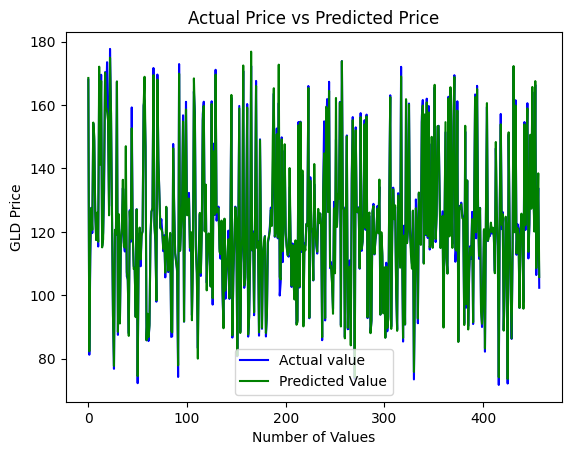

In [24]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

**Project Completed..!!**